In [106]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import sklearn
import nltk
import warnings
warnings.filterwarnings('ignore')

In [134]:
df = pd.read_csv('gender-classifier.csv',encoding="latin1")
df.head()

,_unit_id,_golden,_unit_state,_trusted_judgments,_last_judgment_at,gender,gender:confidence,profile_yn,profile_yn:confidence,created,...,profileimage,retweet_count,sidebar_color,text,tweet_coord,tweet_count,tweet_created,tweet_id,tweet_location,user_timezone
0,815719226,False,finalized,3,10/26/2015 23:24,male,1.0000,yes,1.0,12/5/2013 1:48,...,https://pbs.twimg.com/profile_images/414342229...,0,FFFFFF,Robbie E Responds To Critics After Win Against...,NaN,110964,10/26/2015 12:40,6.590000e+17,main; @Kan1shk3,Chennai
1,815719227,False,finalized,3,10/26/2015 23:30,male,1.0000,yes,1.0,10/1/2012 13:51,...,https://pbs.twimg.com/profile_images/539604221...,0,C0DEED,ÛÏIt felt like they were my friends and I was...,NaN,7471,10/26/2015 12:40,6.590000e+17,NaN,Eastern Time (US & Canada)
2,815719228,False,finalized,3,10/26/2015 23:33,male,0.6625,yes,1.0,11/28/2014 11:30,...,https://pbs.twimg.com/profile_images/657330418...,1,C0DEED,i absolutely adore when louis starts the songs...,NaN,5617,10/26/2015 12:40,6.590000e+17,clcncl,Belgrade
3,815719229,False,finalized,3,10/26/2015 23:10,male,1.0000,yes,1.0,6/11/2009 22:39,...,https://pbs.twimg.com/profile_images/259703936...,0,C0DEED,Hi @JordanSpieth - Looking at the url - do you...,NaN,1693,10/26/2015 12:40,6.590000e+17,"Palo Alto, CA",Pacific Time (US & Canada)
4,815719230,False,finalized,3,10/27/2015 1:15,female,1.0000,yes,1.0,4/16/2014 13:23,...,https://pbs.twimg.com/profile_images/564094871...,0,0,Watching Neighbours on Sky+ catching up with t...,NaN,31462,10/26/2015 12:40,6.590000e+17,NaN,NaN


In [135]:
df = df[['gender','gender:confidence','description','fav_number','retweet_count','text','tweet_count']]
df.head()

,gender,gender:confidence,description,fav_number,retweet_count,text,tweet_count
0,male,1.0000,i sing my own rhythm.,0,0,Robbie E Responds To Critics After Win Against...,110964
1,male,1.0000,I'm the author of novels filled with family dr...,68,0,ÛÏIt felt like they were my friends and I was...,7471
2,male,0.6625,louis whining and squealing and all,7696,1,i absolutely adore when louis starts the songs...,5617
3,male,1.0000,"Mobile guy. 49ers, Shazam, Google, Kleiner Pe...",202,0,Hi @JordanSpieth - Looking at the url - do you...,1693
4,female,1.0000,Ricky Wilson The Best FRONTMAN/Kaiser Chiefs T...,37318,0,Watching Neighbours on Sky+ catching up with t...,31462


In [136]:
df['gender'].value_counts()

female     6700
male       6194
brand      5942
unknown    1117
Name: gender, dtype: int64

In [137]:
df = df[(df['gender'] == 'male') | (df['gender'] == 'female')]
df['gender'].value_counts()

female    6700
male      6194
Name: gender, dtype: int64

In [138]:
df = df[df['gender:confidence'] == 1]
df.shape

(10020, 7)

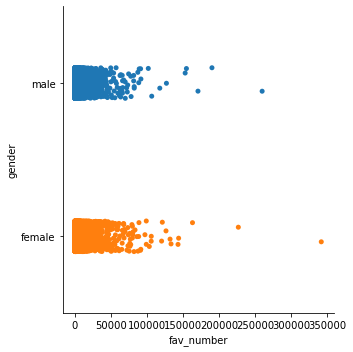

In [139]:
sns.catplot(x='fav_number',y='gender',data=df)

In [140]:
df['fav_log'] = np.log(df['fav_number'])

<AxesSubplot:xlabel='fav_log', ylabel='gender'>

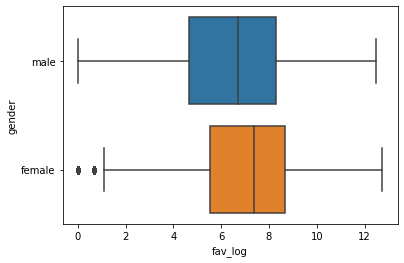

In [141]:
sns.boxplot(x='fav_log',y='gender',data=df)

<AxesSubplot:xlabel='retweet_count', ylabel='gender'>

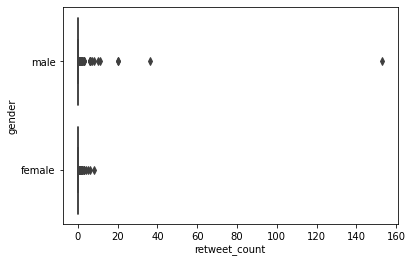

In [142]:
sns.boxplot(x='retweet_count',y='gender',data=df)

In [143]:
df = df.drop(columns = ['retweet_count','fav_number'])

<AxesSubplot:xlabel='tweet_count', ylabel='gender'>

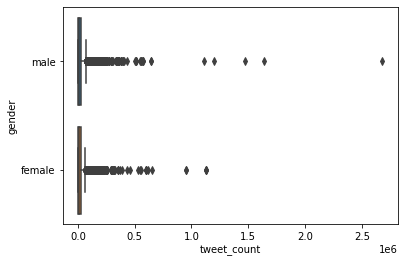

In [144]:
sns.boxplot(x='tweet_count',y='gender',data=df)

<AxesSubplot:xlabel='tweet_log', ylabel='gender'>

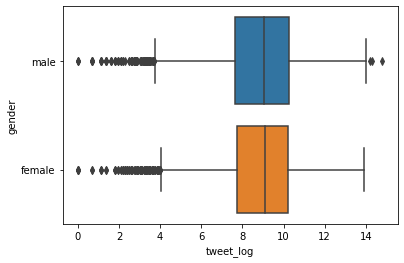

In [145]:
df['tweet_log'] = np.log(df['tweet_count'])
sns.boxplot(x='tweet_log',y='gender',data=df)

In [146]:
df = df.drop(columns=['tweet_log','tweet_count'])

In [147]:
df.head()

,gender,gender:confidence,description,text,fav_log
0,male,1.0,i sing my own rhythm.,Robbie E Responds To Critics After Win Against...,-inf
1,male,1.0,I'm the author of novels filled with family dr...,ÛÏIt felt like they were my friends and I was...,4.219508
3,male,1.0,"Mobile guy. 49ers, Shazam, Google, Kleiner Pe...",Hi @JordanSpieth - Looking at the url - do you...,5.308268
4,female,1.0,Ricky Wilson The Best FRONTMAN/Kaiser Chiefs T...,Watching Neighbours on Sky+ catching up with t...,10.527231
5,female,1.0,you don't know me.,"Ive seen people on the train with lamps, chair...",8.268988


In [148]:
df = df.replace(-np.inf,0)
df.head()

,gender,gender:confidence,description,text,fav_log
0,male,1.0,i sing my own rhythm.,Robbie E Responds To Critics After Win Against...,0.000000
1,male,1.0,I'm the author of novels filled with family dr...,ÛÏIt felt like they were my friends and I was...,4.219508
3,male,1.0,"Mobile guy. 49ers, Shazam, Google, Kleiner Pe...",Hi @JordanSpieth - Looking at the url - do you...,5.308268
4,female,1.0,Ricky Wilson The Best FRONTMAN/Kaiser Chiefs T...,Watching Neighbours on Sky+ catching up with t...,10.527231
5,female,1.0,you don't know me.,"Ive seen people on the train with lamps, chair...",8.268988


In [149]:
df[df['gender:confidence']==1].shape

(10020, 5)

In [150]:
df = df[df['gender:confidence']==1]

In [151]:
df['description'] = df['description'].astype(str)

In [131]:
!pip install autocorrect
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from nltk.corpus import stopwords
nltk.download('wordnet')
import unidecode
from autocorrect import Speller

[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\wia\AppData\Roaming\nltk_data...
[nltk_data]   Unzipping corpora\wordnet.zip.


In [126]:
import re

In [127]:
def case_convert(df,col):
    df[col] = [i.lower() for i in df[col].values]

def remove_specials(df,col):
    df[col] =  [re.sub(r"[^a-zA-Z]"," ",text) for text in df[col].values]

def remove_shorthands(df,col):
    CONTRACTION_MAP = {
    "ain't": "is not",
    "aren't": "are not",
    "can't": "cannot",
    "can't've": "cannot have",
    "'cause": "because",
    "could've": "could have",
    "couldn't": "could not",
    "couldn't've": "could not have",
    "didn't": "did not",
    "doesn't": "does not",
    "don't": "do not",
    "hadn't": "had not",
    "hadn't've": "had not have",
    "hasn't": "has not",
    "haven't": "have not",
    "he'd": "he would",
    "he'd've": "he would have",
    "he'll": "he will",
    "he'll've": "he he will have",
    "he's": "he is",
    "how'd": "how did",
    "how'd'y": "how do you",
    "how'll": "how will",
    "how's": "how is",
    "i'd": "i would",
    "i'd've": "i would have",
    "i'll": "i will",
    "i'll've": "i will have",
    "i'm": "i am",
    "i've": "i have",
    "isn't": "is not",
    "it'd": "it would",
    "it'd've": "it would have",
    "it'll": "it will",
    "it'll've": "it will have",
    "it's": "it is",
    "let's": "let us",
    "ma'am": "madam",
    "mayn't": "may not",
    "might've": "might have",
    "mightn't": "might not",
    "mightn't've": "might not have",
    "must've": "must have",
    "mustn't": "must not",
    "mustn't've": "must not have",
    "needn't": "need not",
    "needn't've": "need not have",
    "o'clock": "of the clock",
    "oughtn't": "ought not",
    "oughtn't've": "ought not have",
    "shan't": "shall not",
    "sha'n't": "shall not",
    "shan't've": "shall not have",
    "she'd": "she would",
    "she'd've": "she would have",
    "she'll": "she will",
    "she'll've": "she will have",
    "she's": "she is",
    "should've": "should have",
    "shouldn't": "should not",
    "shouldn't've": "should not have",
    "so've": "so have",
    "so's": "so as",
    "that'd": "that would",
    "that'd've": "that would have",
    "that's": "that is",
    "there'd": "there would",
    "there'd've": "there would have",
    "there's": "there is",
    "they'd": "they would",
    "they'd've": "they would have",
    "they'll": "they will",
    "they'll've": "they will have",
    "they're": "they are",
    "they've": "they have",
    "to've": "to have",
    "wasn't": "was not",
    "we'd": "we would",
    "we'd've": "we would have",
    "we'll": "we will",
    "we'll've": "we will have",
    "we're": "we are",
    "we've": "we have",
    "weren't": "were not",
    "what'll": "what will",
    "what'll've": "what will have",
    "what're": "what are",
    "what's": "what is",
    "what've": "what have",
    "when's": "when is",
    "when've": "when have",
    "where'd": "where did",
    "where's": "where is",
    "where've": "where have",
    "who'll": "who will",
    "who'll've": "who will have",
    "who's": "who is",
    "who've": "who have",
    "why's": "why is",
    "why've": "why have",
    "will've": "will have",
    "won't": "will not",
    "won't've": "will not have",
    "would've": "would have",
    "wouldn't": "would not",
    "wouldn't've": "would not have",
    "y'all": "you all",
    "y'all'd": "you all would",
    "y'all'd've": "you all would have",
    "y'all're": "you all are",
    "y'all've": "you all have",
    "you'd": "you would",
    "you'd've": "you would have",
    "you'll": "you will",
    "you'll've": "you will have",
    "you're": "you are",
    "you've": "you have"
    }
    texts = []
    for text in df[col].values:
        string = ""
        for word in text.split(" "):
            if word.strip() in list(CONTRACTION_MAP.keys()):
                string = string + " " + CONTRACTION_MAP[word]
            else:
                string = string + " " + word
        texts.append(string.strip())
    df[col] = texts

def remove_stopwords(df,col):
    texts = []
    stopwords_list = stopwords.words('english')
    for item in df[col].values:
        string = ""
        for word in item.split(" "):
            if word.strip() in stopwords_list:
                continue
            else:
                string = string + " " + word
        texts.append(string)
    df[col] = texts
                
def remove_links(df,col):
    texts = []
    for text in df[col].values:
        remove_https = re.sub(r'http\S+', '', text)
        remove_com = re.sub(r"\ [A-Za-z]*\.com", " ", remove_https)
        texts.append(remove_com)
    df[col] = texts

def remove_accents(df,col):
    df[col] = [unidecode.unidecode(text) for text in df[col].values]

def normalize_spaces(df,col):
    df[col] = [re.sub(r"\s+"," ",text) for text in df[col].values]



In [152]:
case_convert(df,'description')
remove_links(df,'description')
#remove_shorthands(df,'description')
remove_accents(df,'description')
remove_specials(df,'description')

normalize_spaces(df,'description')
df.head()

,gender,gender:confidence,description,text,fav_log
0,male,1.0,i sing my own rhythm,Robbie E Responds To Critics After Win Against...,0.000000
1,male,1.0,i m the author of novels filled with family dr...,ÛÏIt felt like they were my friends and I was...,4.219508
3,male,1.0,mobile guy ers shazam google kleiner perkins y...,Hi @JordanSpieth - Looking at the url - do you...,5.308268
4,female,1.0,ricky wilson the best frontman kaiser chiefs t...,Watching Neighbours on Sky+ catching up with t...,10.527231
5,female,1.0,you don t know me,"Ive seen people on the train with lamps, chair...",8.268988


In [154]:
from nltk.tokenize import word_tokenize
df['text'] = [nltk.word_tokenize(tweet) for tweet in df['text']]
descrip_new=[]
for each_row in df['text']:
    descrip_new.append([i for i in each_row if i.isalpha()])
descrip_new_alpha=[]

stop_words = set(stopwords.words('english'))

for each_row in descrip_new:
    descrip_new_alpha.append([i for i in each_row if i not in stop_words])

In [155]:
description_new_lemma = []

lemma = nltk.WordNetLemmatizer()

for each_row in descrip_new_alpha:

    description_new_lemma.append([lemma.lemmatize(word) for word in each_row])

df['text'] = description_new_lemma

df['text'] = [" ".join(desc) for desc in df['text'].values]

In [156]:
df.head(30)

,gender,gender:confidence,description,text,fav_log
0,male,1.0,i sing my own rhythm,robbie e responds critic win eddie edward worl...,0.000000
1,male,1.0,i m the author of novels filled with family dr...,uiit felt like friend living story themu retir...,4.219508
3,male,1.0,mobile guy ers shazam google kleiner perkins y...,hi jordanspieth looking url use ifttt typicall...,5.308268
4,female,1.0,ricky wilson the best frontman kaiser chiefs t...,watching neighbour sky catching neighbs xxx u ...,10.527231
5,female,1.0,you don t know me,ive seen people train lamp chair tv etc,8.268988
7,male,1.0,the secret of getting ahead is getting started,gala bingo club bought aPS uk largest high str...,4.382027
8,female,1.0,pll fan crazy about mcd ramen is bae,aphmau pic defines mcd fangirls fanboys mcd sh...,7.509335
9,female,1.0,renaissance art historian university of nottin...,evielady lovely tree year never seen gorgeous ...,8.043984
15,female,1.0,nan,glow satisfaction glow,0.000000
16,female,1.0,jmkm ou,giannaaa lmao u u dude hella scared next episo...,7.474205


In [153]:
case_convert(df,'text')
remove_links(df,'text')
#remove_shorthands(df,'description')
remove_accents(df,'text')
remove_specials(df,'text')
remove_stopwords(df,'text')
normalize_spaces(df,'text')
df.head()

,gender,gender:confidence,description,text,fav_log
0,male,1.0,i sing my own rhythm,robbie e responds critics win eddie edwards w...,0.000000
1,male,1.0,i m the author of novels filled with family dr...,uiit felt like friends living story themu ret...,4.219508
3,male,1.0,mobile guy ers shazam google kleiner perkins y...,hi jordanspieth looking url use ifttt typical...,5.308268
4,female,1.0,ricky wilson the best frontman kaiser chiefs t...,watching neighbours sky catching neighbs xxx ...,10.527231
5,female,1.0,you don t know me,ive seen people train lamps chairs tvs etc,8.268988


In [157]:
df = df.drop(columns = 'gender:confidence')

In [158]:
lenc = LabelEncoder()
df['gender'] = lenc.fit_transform(df['gender'])

<AxesSubplot:xlabel='gender', ylabel='Count'>

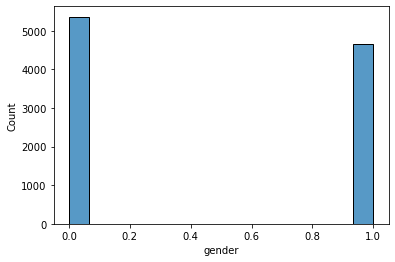

In [159]:
sns.histplot(x='gender',data=df)

In [160]:
vec = TfidfVectorizer(max_features=3000)

X_train, X_test, Y_train, Y_test = train_test_split(vec.fit_transform(df['text'].values).toarray(), 
                                                    df['gender'].values.reshape(-1,1), 
                                                    test_size=0.2, 
                                                    shuffle=True, 
                                                    random_state=42)

In [161]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score
model = RandomForestClassifier(n_estimators=10,random_state=42)
model.fit(X_train, Y_train)

RandomForestClassifier(n_estimators=10, random_state=42)

In [162]:
print("Train Accuracy  : {:.2f} %".format(accuracy_score(model.predict(X_train), Y_train)*100))
print("Test Accuracy   : {:.2f} %".format(accuracy_score(model.predict(X_test), Y_test)*100))
print("Precision       : {:.2f} %".format(precision_score(model.predict(X_test), Y_test,average='macro')*100))
print("Recall          : {:.2f} %".format(recall_score(model.predict(X_test), Y_test,average='macro')*100))

Train Accuracy  : 96.73 %
Test Accuracy   : 57.93 %
Precision       : 56.85 %
Recall          : 57.53 %


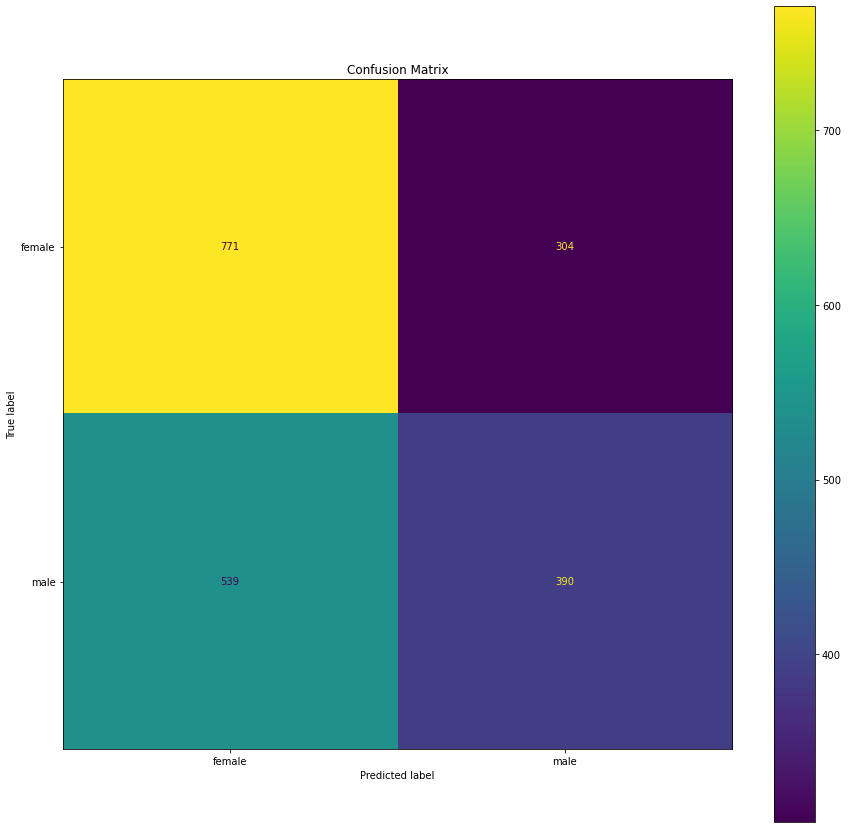

In [163]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
cm = confusion_matrix(Y_test, model.predict(X_test))
disp = ConfusionMatrixDisplay(cm, display_labels=lenc.classes_)
fig, ax = plt.subplots(figsize=(15,15))
disp.plot(ax=ax)
plt.title("Confusion Matrix")
plt.show()

In [164]:
from sklearn.pipeline import make_pipeline
from sklearn.impute import SimpleImputer
my_pipeline = make_pipeline(SimpleImputer(), RandomForestClassifier())

In [165]:
from sklearn.model_selection import cross_val_score
scores = cross_val_score(my_pipeline, X_train, Y_train, scoring='precision')
print(scores)

[0.56357388 0.57875458 0.54242928 0.56617647 0.53954306]


In [166]:
from sklearn.naive_bayes import MultinomialNB
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import LinearSVC

In [167]:
model1 = MultinomialNB()
model1.fit(X_train, Y_train)

MultinomialNB()

In [168]:
print("Train Accuracy  : {:.2f} %".format(accuracy_score(model1.predict(X_train), Y_train)*100))
print("Test Accuracy   : {:.2f} %".format(accuracy_score(model1.predict(X_test), Y_test)*100))
print("Precision       : {:.2f} %".format(precision_score(model1.predict(X_test), Y_test,average='macro')*100))
print("Recall          : {:.2f} %".format(recall_score(model1.predict(X_test), Y_test,average='macro')*100))

Train Accuracy  : 75.21 %
Test Accuracy   : 61.88 %
Precision       : 60.93 %
Recall          : 61.77 %


In [169]:
model2 = KNeighborsClassifier()
model2.fit(X_train,Y_train)

KNeighborsClassifier()

In [170]:
print("Train Accuracy  : {:.2f} %".format(accuracy_score(model2.predict(X_train), Y_train)*100))
print("Test Accuracy   : {:.2f} %".format(accuracy_score(model2.predict(X_test), Y_test)*100))
print("Precision       : {:.2f} %".format(precision_score(model2.predict(X_test), Y_test,average='macro')*100))
print("Recall          : {:.2f} %".format(recall_score(model2.predict(X_test), Y_test,average='macro')*100))

Train Accuracy  : 69.34 %
Test Accuracy   : 54.24 %
Precision       : 52.55 %
Recall          : 53.25 %


In [171]:
model3 = LinearSVC()
model3.fit(X_train,Y_train)

LinearSVC()

In [172]:
print("Train Accuracy  : {:.2f} %".format(accuracy_score(model3.predict(X_train), Y_train)*100))
print("Test Accuracy   : {:.2f} %".format(accuracy_score(model3.predict(X_test), Y_test)*100))
print("Precision       : {:.2f} %".format(precision_score(model3.predict(X_test), Y_test,average='macro')*100))
print("Recall          : {:.2f} %".format(recall_score(model3.predict(X_test), Y_test,average='macro')*100))

Train Accuracy  : 80.89 %
Test Accuracy   : 60.38 %
Precision       : 60.07 %
Recall          : 60.12 %


In [173]:
pipline_1 = make_pipeline(SimpleImputer(), MultinomialNB())
pipline_2 = make_pipeline(SimpleImputer(), KNeighborsClassifier())
pipline_3 = make_pipeline(SimpleImputer(), LinearSVC())
scores_1 = cross_val_score(pipline_1, X_train, Y_train, scoring='precision')
scores_2 = cross_val_score(pipline_2, X_train, Y_train, scoring='precision')
scores_3 = cross_val_score(pipline_3, X_train, Y_train, scoring='precision')

In [174]:
print('Random Forest: ',scores)
print('Naive Bayes: ',scores_1)
print('KNN: ',scores_2)
print('SVC: ',scores_3)

Random Forest:  [0.56357388 0.57875458 0.54242928 0.56617647 0.53954306]
Naive Bayes:  [0.58277027 0.60810811 0.55952381 0.6        0.62285714]
KNN:  [0.5085389  0.52112676 0.47619048 0.48742747 0.47457627]
SVC:  [0.55957162 0.57733538 0.54010695 0.55732946 0.5633383 ]


In [175]:
from sklearn.model_selection import RandomizedSearchCV
n_estimators = [int(x) for x in np.linspace(start = 200, stop = 2000, num = 10)]

max_features = ['auto', 'sqrt']

max_depth = [int(x) for x in np.linspace(10, 110, num = 11)]
max_depth.append(None)

min_samples_split = [2, 5, 10]

min_samples_leaf = [1, 2, 4]

bootstrap = [True, False]

In [176]:
random_grid = {'n_estimators': n_estimators,
               'max_features': max_features,
               'max_depth': max_depth,
               'min_samples_split': min_samples_split,
               'min_samples_leaf': min_samples_leaf,
               'bootstrap': bootstrap}

print(random_grid)

{'n_estimators': [200, 400, 600, 800, 1000, 1200, 1400, 1600, 1800, 2000], 'max_features': ['auto', 'sqrt'], 'max_depth': [10, 20, 30, 40, 50, 60, 70, 80, 90, 100, 110, None], 'min_samples_split': [2, 5, 10], 'min_samples_leaf': [1, 2, 4], 'bootstrap': [True, False]}


In [177]:
rf = RandomForestClassifier()

rf_random = RandomizedSearchCV(estimator = rf
                               , param_distributions = random_grid
                               , n_iter = 100
                               , cv = 3
                               , verbose=2
                               , random_state=42
                               , n_jobs = -1)

rf_random.fit(X_train, Y_train)

Fitting 3 folds for each of 100 candidates, totalling 300 fits


RandomizedSearchCV(cv=3, estimator=RandomForestClassifier(), n_iter=100,
                   n_jobs=-1,
                   param_distributions={'bootstrap': [True, False],
                                        'max_depth': [10, 20, 30, 40, 50, 60,
                                                      70, 80, 90, 100, 110,
                                                      None],
                                        'max_features': ['auto', 'sqrt'],
                                        'min_samples_leaf': [1, 2, 4],
                                        'min_samples_split': [2, 5, 10],
                                        'n_estimators': [200, 400, 600, 800,
                                                         1000, 1200, 1400, 1600,
                                                         1800, 2000]},
                   random_state=42, verbose=2)

In [178]:
rf_random.best_params_

{'n_estimators': 1600,
 'min_samples_split': 10,
 'min_samples_leaf': 1,
 'max_features': 'sqrt',
 'max_depth': None,
 'bootstrap': True}

In [180]:
y_predict = rf_random.predict(X_test)

In [181]:
accuracy = accuracy_score(Y_test, y_predict)
print("Accuracy: %.2f%%" % (accuracy * 100.0))

Accuracy: 59.78%


In [182]:
confusion_matrix(Y_test, y_predict)

array([[757, 318],
       [488, 441]], dtype=int64)